In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import csv
import os
import warnings
from scipy import stats
import matplotlib.pyplot as plt

In [427]:
warnings.filterwarnings('ignore')

In [2]:
months = ['jan', 'feb', 'march', 'april', 'may', 'june','july','august','sept','oct','nov','dec']

In [12]:
jan = pd.read_csv('jan.csv', index_col='Unnamed: 0')

In [17]:
merge = jan
for m in months[1:]:
    target = pd.read_csv(m + '.csv',index_col='Unnamed: 0')
    year_one = pd.concat([merge,target])
    merge = year_one

In [631]:
### year_one_groups merged all the months csv 

In [18]:
year_one_groups = year_one.groupby('sym_root')

In [27]:
AAPL = year_one_groups.get_group('AAPL')

In [21]:
symbol = jan['sym_root'].unique().tolist()

In [29]:
AAPL = AAPL.drop('sym_suffix', axis=1)
AAPL['log_size'] = np.log(AAPL['size'])
AAPL

,date,time,sym_root,size,log_size
2019-01-02 09:31:00,2019-01-02,09:31:00,AAPL,158277.0,11.972102
2019-01-02 09:32:00,2019-01-02,09:32:00,AAPL,155007.0,11.951226
2019-01-02 09:33:00,2019-01-02,09:33:00,AAPL,170003.0,12.043571
2019-01-02 09:34:00,2019-01-02,09:34:00,AAPL,146408.0,11.894153
2019-01-02 09:35:00,2019-01-02,09:35:00,AAPL,218226.0,12.293287
...,...,...,...,...,...
2019-12-31 15:51:00,2019-12-31,15:51:00,AAPL,113130.0,11.636293
2019-12-31 15:52:00,2019-12-31,15:52:00,AAPL,97787.0,11.490547
2019-12-31 15:53:00,2019-12-31,15:53:00,AAPL,117356.0,11.672967
2019-12-31 15:54:00,2019-12-31,15:54:00,AAPL,216173.0,12.283834


In [34]:
aapl_df = AAPL.pivot(index = 'time', columns='date', values='log_size')
aapl_df = aapl_df.dropna(axis=1)
row, column = aapl_df.shape
aapl_x = build_x(row, column)
clean_data = aapl_df.stack().reset_index(-1, drop=True)
x_i, y_i = pick_window (aapl_x, clean_data.values, 30, False,column)
res = stats.linregress(x_i, y_i)

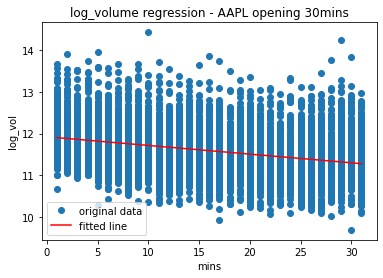

In [42]:
plt.plot(x_i, y_i, 'o', label='original data')
plt.plot(x_i, res.intercept + res.slope*x_i, 'r', label='fitted line')
plt.xlabel('mins')
plt.ylabel('log_vol')
plt.legend()
plt.title("log_volume regression - AAPL opening 30mins")
plt.show()

In [31]:
def build_x (row,column):
    lst = []
    for j in range(0, row):
        res = []
        for _ in range(0, column):
            res.append(j)
        lst.extend(res)
    return np.array(lst)

In [386]:
x = np.array(lst)

In [550]:
a_file = open("sp500_r2.csv", "w")
writer = csv.writer(a_file)
for key, value in r_sqr.items():
    writer.writerow([key, value])
a_file.close()

In [586]:
sp500 = pd.DataFrame.from_dict(r_sqr, orient='index')

In [587]:
sp500 = sp500.reset_index()
sp500 = sp500.rename(columns={'index':'symbol', 0:'r2'})

In [547]:
r_sqr.keys()

dict_keys(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AES', 'AFL', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ATO', 'ATVI', 'AVB', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BKNG', 'BKR', 'BLK', 'BLL', 'BR', 'BRO', 'BSX', 'BWA', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CERN', 'CF', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CME', 'CMG', 'CMI', 'CNC', 'COP', 'COST', 'CPB', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DIS', 'DLTR', 'DOW', 'DPZ', 'DRE', 'DRI', 'DTE', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENPH', 'EOG', 'EQIX', 'EQR', 'ES', 'ESS', 'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 

In [588]:
sp500

,symbol,r2
0,A,5.627490e-07
1,AAL,3.825205e-02
2,AAP,5.050890e-03
3,AAPL,1.079417e-01
4,ABBV,6.481918e-03
...,...,...
396,MCK,1.471792e-03
397,NDSN,3.515151e-02
398,STE,3.188227e-05
399,WST,3.160953e-02


In [609]:
sp500_p = pd.DataFrame.from_dict(p_value_dict, orient='index')

In [625]:
sp500_p.to_csv('sp500_p.csv')

In [619]:
p_value_dict = {}
for i, s in enumerate(stocks):
    dataset = year_one_groups.get_group(s)
    dataset.loc[:,'log_size'] = np.log(dataset['size'])
    y_df = dataset.pivot(index = 'time', columns='date', values='log_size')
    y_df = y_df.dropna(axis=1)
    row, column = y_df.shape
    x = build_x(row, column)
    no_half_day = y_df.stack().reset_index(-1, drop=True)
    x_i, y_i = pick_window (x, no_half_day.values, 30, False,column)
    res = stats.linregress(x_i, y_i)
    p_value_dict[s] = (res.pvalue)

0
pass
1
pass
2
pass
3
pass
4
pass
5
pass
6
pass
7
pass
8
pass
9
pass
10
pass
11
pass
12
pass
13
pass
14
pass
15
pass
16
pass
17
pass
18
pass
19
pass
20
pass
21
pass
22
pass
23
pass
24
pass
25
pass
26
pass
27
pass
28
pass
29
pass
30
pass
31
pass
32
pass
33
pass
34
pass
35
pass
36
pass
37
pass
38
pass
39
pass
40
pass
41
pass
42
pass
43
pass
44
pass
45
pass
46
pass
47
pass
48
pass
49
pass
50
pass
51
pass
52
pass
53
pass
54
pass
55
pass
56
pass
57
pass
58
pass
59
pass
60
pass
61
pass
62
pass
63
pass
64
pass
65
pass
66
pass
67
pass
68
pass
69
pass
70
pass
71
pass
72
pass
73
pass
74
pass
75
pass
76
pass
77
pass
78
pass
79
pass
80
pass
81
pass
82
pass
83
pass
84
pass
85
pass
86
pass
87
pass
88
pass
89
pass
90
pass
91
pass
92
pass
93
pass
94
pass
95
pass
96
pass
97
pass
98
pass
99
pass
100
pass
101
pass
102
pass
103
pass
104
pass
105
pass
106
pass
107
pass
108
pass
109
pass
110
pass
111
pass
112
pass
113
pass
114
pass
115
pass
116
pass
117
pass
118
pass
119
pass
120
pass
121
pass
122
pass
123

In [94]:
p_value = pd.read_csv('sp500_p.csv', index_col='Unnamed: 0')
p_value

,0
A,9.249318e-01
AAL,2.296565e-66
AAP,1.001882e-09
AAPL,1.512093e-187
ABBV,2.115137e-12
...,...
MCK,8.255859e-04
NDSN,8.086207e-21
STE,6.227150e-01
WST,2.129886e-13


In [95]:
p_value = p_value.reset_index()

In [96]:
p_value = p_value.rename(columns={'index':'symbol', '0':'p'})

In [129]:
r_square = pd.read_csv('sp500_r2.csv', index_col='Unnamed: 0')
r_square = r_square.reset_index()
r_square = r_square.rename(columns={'index':'symbol', '0':'r2'})

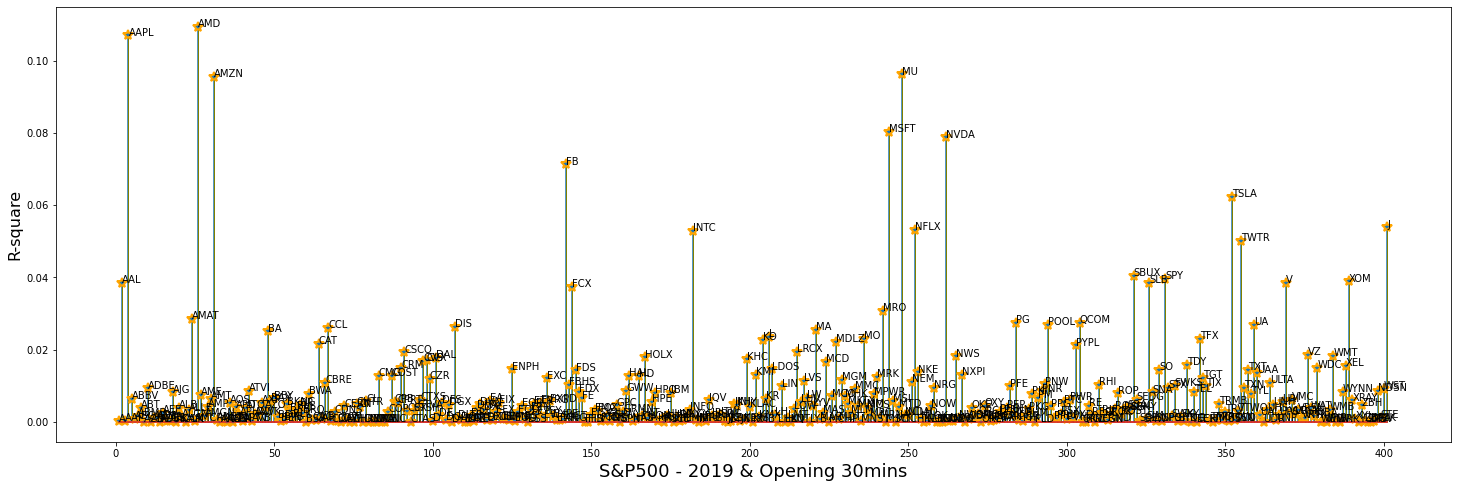

In [142]:
x_index = np.arange(1, len(r_square['symbol'])+1)
y_index = r_square['r2'].values
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
ax.stem(x_index, y_index, markerfmt=' ')
ax.set_xlabel('S&P500 - 2019 & Opening 30mins', fontsize=18)
ax.set_ylabel('R-square', fontsize=16)
for i, txt in enumerate(r_square.symbol.values):
    ax.annotate(txt, (x_index[i], y_index[i]))
(markers, stemlines, baseline) = plt.stem(x_index,y_index)
plt.setp(stemlines,linestyle="-", color="olive", linewidth=1 )
plt.setp(markers, marker='*', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.show()

In [113]:
value_p_sign = p_value[p_value['p'].values < 0.05]

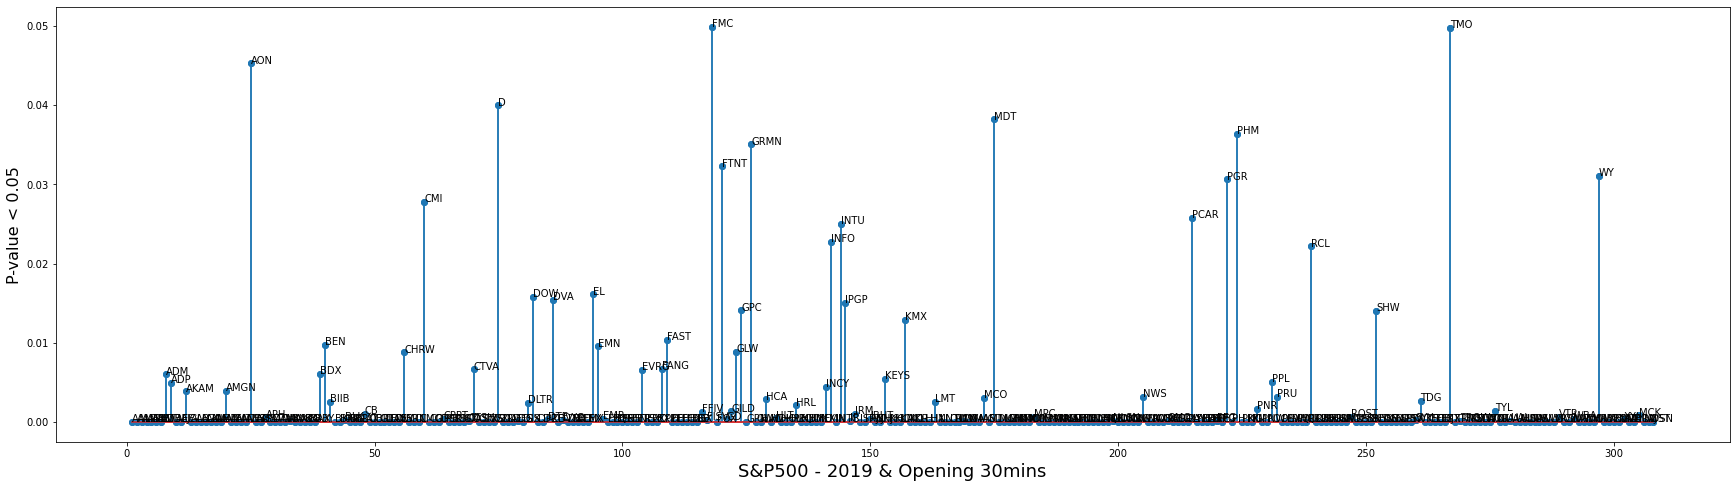

In [128]:
x_index = np.arange(1, len(value_p_sign['symbol'])+1)
y_index = value_p_sign['p'].values
fig, ax = plt.subplots()
fig.set_size_inches(30, 8)
ax.stem(x_index, y_index)
ax.set_xlabel('S&P500 - 2019 & Opening 30mins', fontsize=18)
ax.set_ylabel('P-value < 0.05', fontsize=16)
for i, txt in enumerate(value_p_sign.symbol.values):
    ax.annotate(txt, (x_index[i], y_index[i]))
plt.stem(x_index,y_index)
plt.show()

In [605]:
stocks = list(r_sqr.keys())

In [628]:
sp500 = pd.DataFrame.from_dict(r_sqr, orient='index')

In [630]:
sp500.to_csv('sp500_r2.csv')

In [224]:
aal = year_one_groups.get_group('AAL')

In [225]:
aal.loc[:,'log_size'] = np.log(aal['size'])
aal

/var/folders/f2/41ckpyln3370bz1wf7vdknb80000gn/T/ipykernel_7624/4266806414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aal.loc[:,'log_size'] = np.log(aal['size'])


,date,time,sym_root,size,sym_suffix,log_size
2019-01-02 09:31:00,2019-01-02,09:31:00,AAL,14135.0,NaN,9.556409
2019-01-02 09:32:00,2019-01-02,09:32:00,AAL,16687.0,NaN,9.722385
2019-01-02 09:33:00,2019-01-02,09:33:00,AAL,16276.0,NaN,9.697447
2019-01-02 09:34:00,2019-01-02,09:34:00,AAL,15875.0,NaN,9.672501
2019-01-02 09:35:00,2019-01-02,09:35:00,AAL,34654.0,NaN,10.453168
...,...,...,...,...,...,...
2019-12-31 15:51:00,2019-12-31,15:51:00,AAL,20025.0,NaN,9.904737
2019-12-31 15:52:00,2019-12-31,15:52:00,AAL,21228.0,NaN,9.963076
2019-12-31 15:53:00,2019-12-31,15:53:00,AAL,24124.0,NaN,10.090962
2019-12-31 15:54:00,2019-12-31,15:54:00,AAL,64341.0,NaN,11.071952


In [313]:
y_df = aal.pivot(index = 'time', columns='date', values='log_size')

date,2019-01-02,2019-01-03,2019-01-04,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,2019-01-14,2019-01-15,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
time,,,,,,,,,,,,,,,,,,,,,
09:31:00,9.556409,11.654790,10.246935,10.585018,9.816513,10.357616,12.534779,10.572393,9.958070,11.550202,...,10.263816,9.841293,10.112208,10.295563,10.591773,10.315100,8.416710,9.743495,10.254356,10.081173
09:32:00,9.722385,11.406320,10.672693,11.307425,10.380932,10.240138,12.349107,9.672690,10.317747,11.190017,...,9.913388,10.791317,10.281547,10.159214,11.238620,10.025130,9.906782,9.737020,10.911555,9.685518
09:33:00,9.697447,11.024318,10.770714,11.141659,10.360786,10.630456,12.653009,10.166851,11.454364,11.214789,...,10.542706,10.175993,9.464517,9.982437,10.437492,9.826445,10.021537,10.033243,10.428186,9.545097
09:34:00,9.672501,11.278152,10.918265,10.459583,10.574951,10.410396,12.151949,10.554249,10.322033,11.504016,...,9.964394,9.595263,9.885578,10.196269,10.510423,10.093695,10.151558,9.405167,10.134321,10.177932
09:35:00,10.453168,11.750319,10.348366,10.937312,10.264304,10.844959,12.628782,10.115368,9.968760,11.295416,...,11.288982,9.553079,9.968994,9.575122,10.832359,9.052165,9.038365,10.691968,10.188441,9.844480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:51:00,9.556197,11.293886,11.014720,11.148924,9.707412,9.583489,10.239924,9.811482,10.547943,10.939373,...,10.182406,11.002716,9.240093,11.555266,10.343805,NaN,10.426913,11.002666,10.186484,9.904737
15:52:00,9.865059,10.744818,10.446509,10.154869,10.699124,10.515587,10.840032,9.924074,10.044857,10.558881,...,10.097861,9.692334,10.103281,10.995830,10.949543,NaN,10.189305,11.311678,10.165929,9.963076
15:53:00,9.553221,11.233529,10.475907,10.578598,10.525380,10.048107,11.272521,10.447032,10.401410,10.360058,...,10.575130,10.332213,11.707324,12.115409,11.548669,NaN,10.447496,11.077810,9.727585,10.090962


In [366]:
no_half_day = y_df.dropna(axis=1)

In [501]:
no_half_day

time
09:31:00     8.350194
09:31:00     7.893572
09:31:00     9.152181
09:31:00     1.609438
09:31:00     7.691200
              ...    
15:55:00    10.589132
15:55:00    11.366708
15:55:00     9.987737
15:55:00     9.044994
15:55:00     9.497472
Length: 71225, dtype: float64

In [380]:
new_data = no_half_day.stack().reset_index(-1, drop=True)

In [421]:
res = stats.linregress(x_i, y_i)

In [422]:
res.rvalue**2

0.014369707064426158

### Optional: Section for opening all the files and read into dataframes 

In [154]:
#open file and read + clean 
lst = [None]*31
for i, _ in enumerate(lst):
    ix = 12*100 + i + 1 
    if os.path.isfile('/Users/zss/OneDrive - The University of Chicago/DRW_Trading/self_edit/SP500/SP500_2019'+str(ix)+'.csv'):
        value = pd.read_csv('/Users/zss/OneDrive - The University of Chicago/DRW_Trading/self_edit/SP500/SP500_2019'+str(ix)+'.csv')
        value.index = pd.to_datetime(value['date'] + ' ' + value['time'])
        value = value.between_time('09:31:00', '15:55:00')
        lst[i] = value
    else:
        pass

In [33]:
def pick_window (x_value, y_value, win_in_mins, tail, columns):
    mins = win_in_mins + 2
    if tail is False:
        y_i = y_value[columns:columns*mins]
        x_i = x_value[columns:columns*mins]
    else:
        y_i = y_value[-columns*(mins):-columns]
        x_i = x_value[-columns*(mins):-columns]
    return x_i, y_i

In [155]:
#concat 
dec = pd.concat(lst)

In [156]:
dec.tail()

,date,time,sym_root,sym_suffix,size
2019-12-31 15:55:00,2019-12-31,15:55:00,YUM,NaN,28056.0
2019-12-31 15:55:00,2019-12-31,15:55:00,ZBH,NaN,4996.0
2019-12-31 15:55:00,2019-12-31,15:55:00,ZBRA,NaN,1036.0
2019-12-31 15:55:00,2019-12-31,15:55:00,ZION,NaN,9677.0
2019-12-31 15:55:00,2019-12-31,15:55:00,ZTS,NaN,9852.0


In [157]:
#write to csv just in case... 
#dec.to_csv('dec.csv')